<a href="https://colab.research.google.com/github/10erick-cpu/Entregas/blob/main/TP5/TP5_FFT_Transformada_de_Fourier_%26_Procesamiento_Espectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Práctico V**

El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:


*   Cargar una imagen
*   Generar la TF directa de la imagen y ver su espectro
*   A partir del espectro generado mediante la TF inversa obtener la imagen
*   Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
*   Debe permitir cargar el espectro de imagen a partir de un bitmap

#**Aclaración**



Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, 
rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes)

Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.

**Nota**: se sugiere usar los widgets tipo botón para ejecutar las operaciones mencionadas y que el aplicativo interactivo tengas todas las funciones en el mismo entorno.

Por favor revisar cuidadosamente los videos de la teoría donde se explica cuidadosamente todas las características que se desea tenga el aplicativo. 









### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Steven Martinez Vargas


In [309]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Librerias Usadas**

In [310]:
import matplotlib.pyplot as plt 
import numpy as np
import imageio as io
from scipy import fftpack
import numpy.fft
import numpy.fft as fp
from PIL import Image
import math

# **Función para leer la imágen y mostrarla**

#**Circulo**

(626, 626, 3) <class 'numpy.ndarray'>


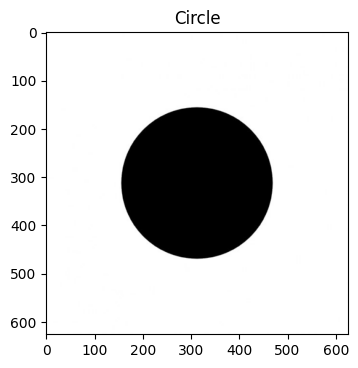

In [370]:
### Función para leer la Imagen y convertirlo en array ###

def read_ima(path):
    ima = np.asarray(Image.open(path))
    print(ima.shape, type(ima))
    return ima

### Función para leer los canales RGB ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0], ima[:, :, 1], ima[:, :, 2]
    return r, g, b

# r,g,b= channels_ima(im_a)
# print(r,g,b)


## Defino el path ##

path1 = '/content/Circulo.jpg'

## Leo la Imagen en función del path ##

ima1 = read_ima(path1)

### Graficamos la imagen 1 ###

def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('on')
  plt.show()

plot_image(ima1 ,title='Circle')

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ para trabajar con la Luminancia**

In [371]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

ra,ga,ba = channels_ima(ima1)


### Funciones para trabajar en los espacios RGB - YIQ -- Canales independientes ##

def trans_rgb_to_yiq(r,g,b):
    y= 0.299*r + 0.587*g + 0.114*b
    i= 0.595716*r - 0.274453*g - 0.321263*b
    q= 0.211456*r - 0.522591*g + 0.311135*b 
    return y,i,q

def trans_yiq_to_rgb(y,i,q):
    r= ( y + 0.9663*i + 0.6210*q)*255.0
    g= (y - 0.2721*i - 0.6474*q)*255.0
    b= (y - 1.1070*i + 1.7046*q)*255.0
    return clip_rgb(r,g,b)

####  Funciones para Clipear los espacios YIQ & RGB ####

def clip_rgb(r,g,b): 
  r=np.clip(r,0,255)
  g=np.clip(g,0,255)
  b=np.clip(g,0,255)
  return r,g,b

def clip_yiq(y,i,q):
  y=np.clip(y,0,1)
  i=np.clip(i,-0.5957,0.5957)
  q=np.clip(q,-0.5226,0.5226)
  return y,i,q

# **Valores de Ya Ia Qa - Imágen A (Circulo)**

In [372]:
### Valores de Y I Q , para la imagen A

Ra,Ga,Ba = clip_rgb(ra,ga,ba)

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Ya,Ia,Qa = trans_rgb_to_yiq(Ra,Ga,Ba)

# Ya,Ia,Qa = trans_rgb_to_yiq(ra,ga,ba)

YA,IA,QA = clip_yiq(Ya,Ia,Qa)

# Obtenemos la Luminancia

YA

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#**Transformada de Fourier Discreta ( Directa) - Espectro  / Magnitud - Fase**

3.090578010216518 209.93771913858959


<Figure size 432x288 with 0 Axes>

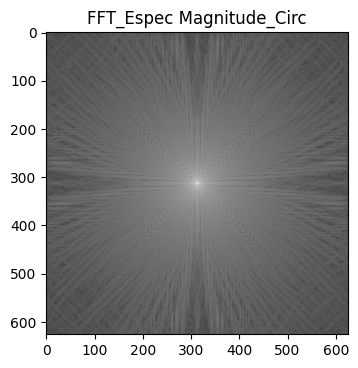

<Figure size 432x288 with 0 Axes>

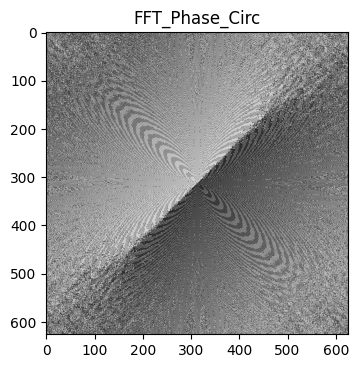

In [373]:
# Usaremos la imagen(Circulo.jpg) (Luminacia) como entrada y fft2 () 
#para obtener los componentes real e imaginaria de los coeficientes de Fourier;
# después de eso, calcularemos la magnitud / espectro y la fase.
# Finalmente, usaremos ifft2 () para reconstruir la imagen:

# Imagen de Entrada

im = YA

# Transformada de Fourier Rapida (FFT) para calcular la DFT (Transformada de 
#Fourier Discreta)- Trabajamos sobre la Luminanci

fc = np.fft.fftshift(np.fft.fft2(im)) #numpy  

# Para conocer la parte real e imaginaria de la Transformada de Fourier tenemos 
# que determinar el valor absoluto y el angulo de la Transformada para conocer 
# su Magnitud y su Fase Respectivamente

# Magnitud

mag = np.abs(fc)

# Fase

phase = np.angle(fc) ##### 
 

# Escalamos para Obtener matriz para valores entre 0 y 255

Yfc = np.log10(mag)
Yfc = 26*Yfc 
Yfc += 67


print(Yfc.min(),Yfc.max()) ##TENER EN CUENTA

Yfc1 = np.clip(Yfc,0,255)
Yfc1 = Yfc.astype('uint8')   


# Ploteamos Magnitud del Espectro FFT

plt.figure(0)
plot_image(Yfc1,'FFT_Espec Magnitude_Circ',cmap='gray')



# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('FFT_Magnitude_Circ.png', Yfc1)


# Ploteamos la Fase FFT

plt.figure(1)
plot_image(phase,'FFT_Phase_Circ',cmap='gray') 


# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('FFT_Phase_Circ.png', phase) 
# Sale WARNING, pero puedo ver la fase que corresponde en el aplicativo

# Con esto elimino el Warning, pero en el aplicativo la Fase me da distinto
# io.imwrite('FFT_Phase_Circ.png', phase.astype('uint8')) 


#**Transformada de Fourier Discreta Inversa (IDFT) - Reconstrucción de la imágen**

# **Generación el espectro a partir de la Magnitud y Fase Obtenidas**

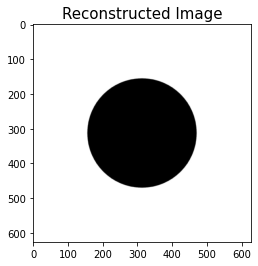

In [374]:
# Proceso inversos según orden de preponderancia

iYfc = Yfc - 67
iYfc = iYfc/26
iYfc = np.power(10,iYfc)

# Espectro Del Circulo

Espec_Circ = iYfc*(np.cos(phase)+ np.sin(phase)*1j) # np.angle

## Transformada Inversa del Espectro del Circulo - Reconstrucción de la Imagen

iYfc1 = np.fft.ifftshift(Espec_Circ)
iYfc1_img1 = np.fft.ifft2(iYfc1).real   #imagen Obtenida


plt.figure(0)
plt.imshow(iYfc1_img1*255,cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()


# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('Recons_Img_Cir.png', (iYfc1_img1*255).astype('uint8')) 



# **Ploteo  - Imágen Circulo** 

*   Imagen Original ( Circulo - Luminancia YA)
*   DFT (Transformada de Fourier Discreta) -  Magnitud/Espectro & Fase 
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen 


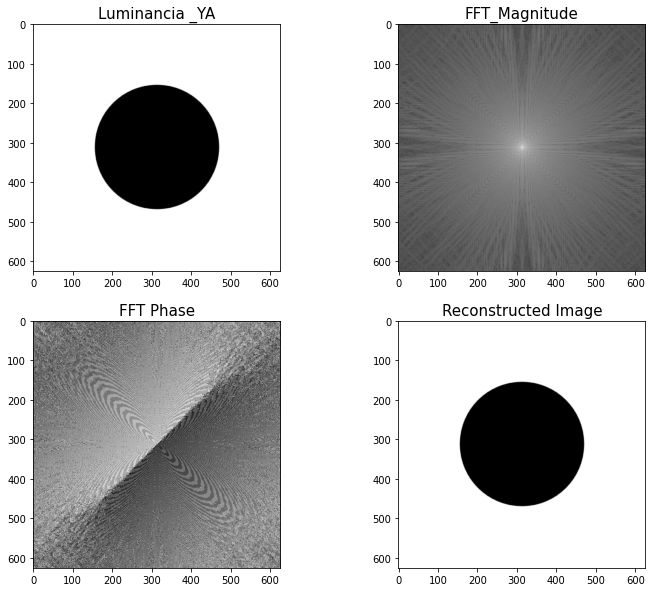

In [375]:
plt.figure(figsize=(12,10))


plt.subplot(2,2,1), 
plt.imshow(im,'gray')
plt.title('Luminancia _YA', size=15)


plt.subplot(2,2,2), 
plt.imshow(Yfc1,'gray')
plt.title('FFT_Magnitude', size=15)


plt.subplot(2,2,3),
plt.imshow(phase,'gray')
plt.title('FFT Phase', size=15)


plt.subplot(2,2,4),
plt.imshow(iYfc1_img1*255, cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Función para leer la imágen y mostrarla**

#**Cuadrado**


(800, 800, 3) <class 'numpy.ndarray'>


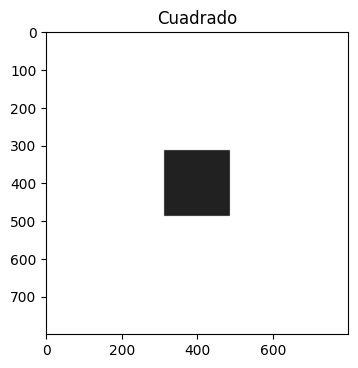

In [317]:
## Defino el path ##

path2 = '/content/Cuadrado.jpg'

## Leo la Imagen en función del path ##

ima2 = read_ima(path2)

### Graficamos la imagen 2 ###

plot_image(ima2 ,title='Cuadrado')

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ para trabajar con la Luminancia**

In [318]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

rb,gb,bb = channels_ima(ima2)


# **Valores de Yb Ib Qb - Imágen B (Cuadrado)**

In [319]:
### Valores de Y I Q , para la imagen b

Rb,Gb,Bb = clip_rgb(rb,gb,bb)

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yb,Ib,Qb = trans_rgb_to_yiq(Rb,Gb,Bb)

YB,IB,QB = clip_yiq(Yb,Ib,Qb)

# Obtenemos la Luminancia

YB

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#**Transformada de Fourier Discreta ( Directa) - Espectro  / Magnitud - Fase**

14.770709914143424 250.4837342093927


<Figure size 432x288 with 0 Axes>

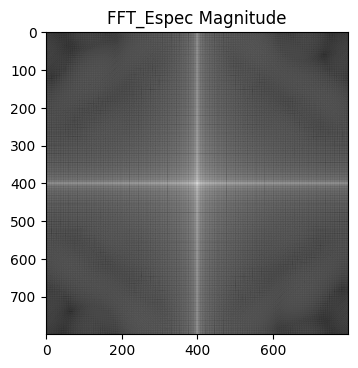

<Figure size 432x288 with 0 Axes>

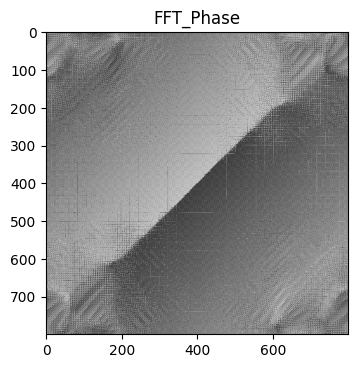

In [320]:
# Usaremos la imagen(Cuadrado.jpg) (Luminacia) como entrada y fft2 () 
#para obtener los componentes real e imaginaria de los coeficientes de Fourier;
# después de eso, calcularemos la magnitud / espectro y la fase.
# Finalmente, usaremos ifft2 () para reconstruir la imagen:

# Imagen de Entrada

im1 = YB

# Transformada de Fourier Rapida (FFT) para calcular la DFT (Transformada de 
#Fourier Discreta)- Trabajamos sobre la Luminanci

fc1 = np.fft.fftshift(np.fft.fft2(im1)) #numpy  

# Para conocer la parte real e imaginaria de la Transformada de Fourier tenemos 
# que determinar el valor absoluto y el angulo de la Transformada para conocer 
# su Magnitud y su Fase Respectivamente

# Magnitud

mag1 = np.abs(fc1)

# Fase

phase1 = np.angle(fc1)


# Escalamos para Obtener matriz para valores entre 0 y 255

Yfc1 = np.log10(mag1)
Yfc1 = 26*Yfc1 
Yfc1 += 100


print(Yfc1.min(),Yfc1.max()) ##TENER EN CUENTA

Yfc1_1 = np.clip(Yfc1,0,255)
Yfc1_1 = Yfc1.astype('uint8')   


# Ploteamos Magnitud del Espectro FFT

plt.figure(0)
plot_image(Yfc1_1,'FFT_Espec Magnitude',cmap='gray')


# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('FFT_Magnitude_Cuadr.png', Yfc1_1)


# Ploteamos la Fase FFT

plt.figure(1)
plot_image(phase1,'FFT_Phase',cmap='gray') 

# Guardamos la Imagen de Salida para su visualizacion al final #
io.imwrite('FFT_Phase_Cuadr.png', phase1)

#**Transformada de Fourier Discreta Inversa (IDFT) - Reconstrucción de la imágen**

# **Generación el espectro a partir de la Magnitud y Fase Obtenidas**

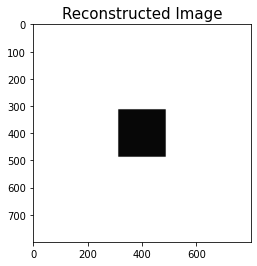

In [321]:
# Proceso inversos según orden de preponderancia

iYfc_1 = Yfc1 - 100
iYfc_1 = iYfc_1/26
iYfc_1 = np.power(10,iYfc_1)

# Espectro Del Circulo

Espec_Cuadra = iYfc_1*(np.cos(phase1)+ np.sin(phase1)*1j) # np.angle

## Transformada Inversa del Espectro del Circulo - Reconstrucción de la Imagen

iYfc1_2 = np.fft.ifftshift(Espec_Cuadra)
iYfc1_img2 = np.fft.ifft2(iYfc1_2).real   #imagen Obtenida


plt.figure(0)
plt.imshow(iYfc1_img2*255,cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()


# Guardamos la Imagen de Salida para su visualizacion al final #
io.imwrite('Recons_Img_Cuadr.png', (iYfc1_img2*255).astype('uint8')) 

# **Ploteo  - Imágen Cuadrado** 

*   Imagen Original ( Cuadrado - Luminancia YB)
*   DFT (Transformada de Fourier Discreta) -  Magnitud/Espectro & Fase 
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen 


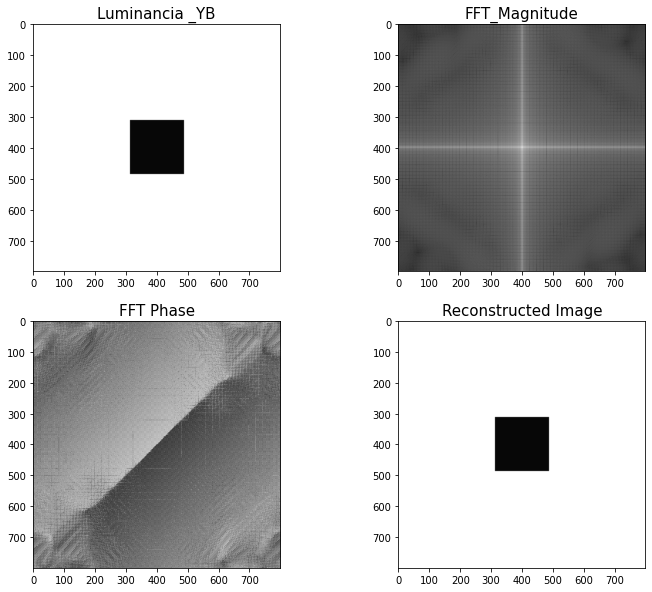

In [322]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1), 
plt.imshow(im1,'gray')
plt.title('Luminancia _YB', size=15)


plt.subplot(2,2,2), 
plt.imshow(Yfc1_1,'gray')
plt.title('FFT_Magnitude', size=15)


plt.subplot(2,2,3),
plt.imshow(phase1,'gray')
plt.title('FFT Phase', size=15)


plt.subplot(2,2,4),
plt.imshow(iYfc1_img2*255, cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Función para leer la imágen y mostrarla**

#**Elipse**


(512, 512, 3) <class 'numpy.ndarray'>


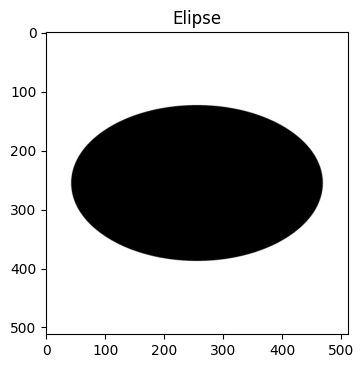

In [323]:
## Defino el path ##

path3 = '/content/Elipse.jpg'

## Leo la Imagen en función del path ##

ima3 = read_ima(path3)

### Graficamos la imagen 3 ###

plot_image(ima3 ,title='Elipse')

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ para trabajar con la Luminancia**

In [324]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

rc,gc,bc = channels_ima(ima3)

# **Valores de Yc Ic Qc - Imágen C (Elipse)**

In [325]:
### Valores de Y I Q , para la imagen c

Rc,Gc,Bc = clip_rgb(rc,gc,bc)

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yc,Ic,Qc = trans_rgb_to_yiq(Rc,Gc,Bc)

YC,IC,QC = clip_yiq(Yc,Ic,Qc)

# Obtenemos la Luminancia

YC

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#**Transformada de Fourier Discreta ( Directa) - Espectro  / Magnitud - Fase**

18.387924935618905 201.22783028155342


<Figure size 432x288 with 0 Axes>

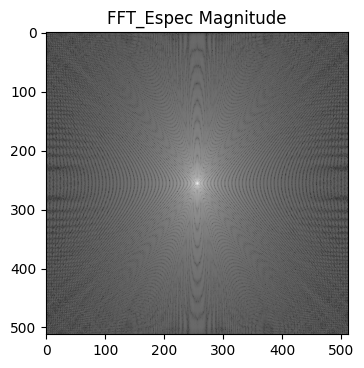

<Figure size 432x288 with 0 Axes>

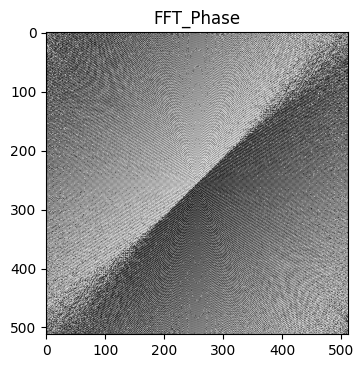

In [326]:
# Usaremos la imagen(Elipse.jpg) (Luminacia) como entrada y fft2 () 
#para obtener los componentes real e imaginaria de los coeficientes de Fourier;
# después de eso, calcularemos la magnitud / espectro y la fase.
# Finalmente, usaremos ifft2 () para reconstruir la imagen:

# Imagen de Entrada

im2 = YC

# Transformada de Fourier Rapida (FFT) para calcular la DFT (Transformada de 
#Fourier Discreta)- Trabajamos sobre la Luminanci

fc2 = np.fft.fftshift(np.fft.fft2(im2)) #numpy  

# Para conocer la parte real e imaginaria de la Transformada de Fourier tenemos 
# que determinar el valor absoluto y el angulo de la Transformada para conocer 
# su Magnitud y su Fase Respectivamente

# Magnitud

mag2 = np.abs(fc2)

# Fase

phase2 = np.angle(fc2)


# Escalamos para Obtener matriz para valores entre 0 y 255

Yfc2 = np.log10(mag2)
Yfc2 = 26*Yfc2 
Yfc2 += 65


print(Yfc2.min(),Yfc2.max()) ##TENER EN CUENTA

Yfc1_2 = np.clip(Yfc1,0,255)
Yfc1_2 = Yfc2.astype('uint8')   


# Ploteamos Magnitud del Espectro FFT

plt.figure(0)
plot_image(Yfc1_2,'FFT_Espec Magnitude',cmap='gray')

# Ploteamos la Fase FFT

plt.figure(1)
plot_image(phase2,'FFT_Phase',cmap='gray')

#**Transformada de Fourier Discreta Inversa (IDFT) - Reconstrucción de la imágen**

# **Generación el espectro a partir de la Magnitud y Fase Obtenidas**

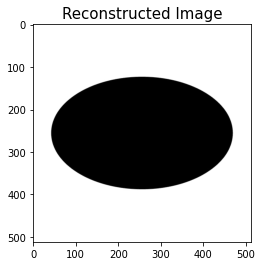

In [327]:
# Proceso inversos según orden de preponderancia

iYfc_2 = Yfc2 - 65
iYfc_2 = iYfc_2/26
iYfc_2 = np.power(10,iYfc_2)

# Espectro Del Circulo

Espec_Elip = iYfc_2*(np.cos(phase2)+ np.sin(phase2)*1j) # np.angle

## Transformada Inversa del Espectro de la Elipse - Reconstrucción de la Imagen

iYfc1_3 = np.fft.ifftshift(Espec_Elip)
iYfc1_img3 = np.fft.ifft2(iYfc1_3).real   #imagen Obtenida


plt.figure(0)
plt.imshow(iYfc1_img3*255,cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Ploteo  - Imágen Elipse** 

*   Imagen Original ( Elipse - Luminancia YC)
*   DFT (Transformada de Fourier Discreta) -  Magnitud/Espectro & Fase 
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen 


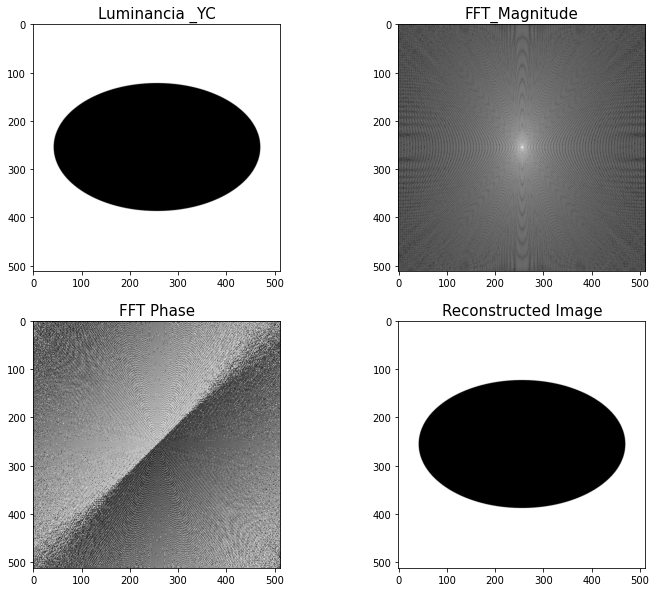

In [328]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1), 
plt.imshow(im2,'gray')
plt.title('Luminancia _YC', size=15)


plt.subplot(2,2,2), 
plt.imshow(Yfc1_2,'gray')
plt.title('FFT_Magnitude', size=15)


plt.subplot(2,2,3),
plt.imshow(phase2,'gray')
plt.title('FFT Phase', size=15)


plt.subplot(2,2,4),
plt.imshow(iYfc1_img3*255, cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Función para leer la imágen y mostrarla**

#**Rombo**



(512, 512, 3) <class 'numpy.ndarray'>


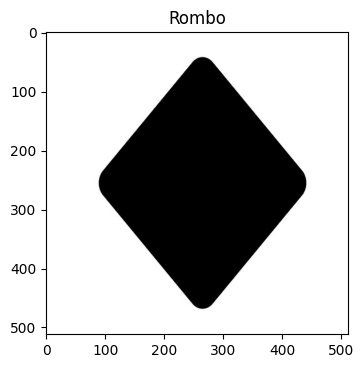

In [329]:
## Defino el path ##

path4 = '/content/Rombo.jpg'

## Leo la Imagen en función del path ##

ima4 = read_ima(path4)

### Graficamos la imagen 4 ###

plot_image(ima4 ,title='Rombo')

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ para trabajar con la Luminancia**

In [330]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

rd,gd,bd = channels_ima(ima4)

# **Valores de Yd Id Qd - Imágen D (Rombo)**

In [331]:
### Valores de Y I Q , para la imagen d

Rd,Gd,Bd = clip_rgb(rd,gd,bd)

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Yd,Id,Qd = trans_rgb_to_yiq(Rd,Gd,Bd)

YD,ID,QD = clip_yiq(Yd,Id,Qd)

# Obtenemos la Luminancia

YD


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#**Transformada de Fourier Discreta ( Directa) - Espectro  / Magnitud - Fase**

16.56222814588542 201.56075318762868


<Figure size 432x288 with 0 Axes>

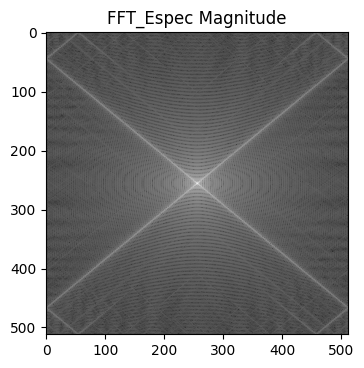

<Figure size 432x288 with 0 Axes>

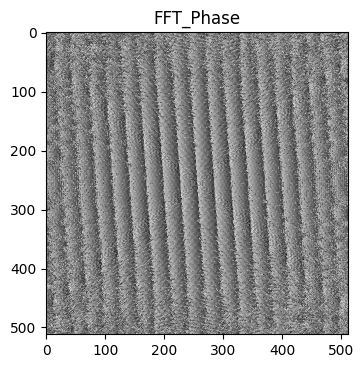

In [332]:
# Usaremos la imagen(Rombo.jpg) (Luminacia) como entrada y fft2 () 
#para obtener los componentes real e imaginaria de los coeficientes de Fourier;
# después de eso, calcularemos la magnitud / espectro y la fase.
# Finalmente, usaremos ifft2 () para reconstruir la imagen:

# Imagen de Entrada

im3 = YD

# Transformada de Fourier Rapida (FFT) para calcular la DFT (Transformada de 
#Fourier Discreta)- Trabajamos sobre la Luminanci

fc3 = np.fft.fftshift(np.fft.fft2(im3)) #numpy  

# Para conocer la parte real e imaginaria de la Transformada de Fourier tenemos 
# que determinar el valor absoluto y el angulo de la Transformada para conocer 
# su Magnitud y su Fase Respectivamente

# Magnitud

mag3 = np.abs(fc3)

# Fase

phase3 = np.angle(fc3)


# Escalamos para Obtener matriz para valores entre 0 y 255

Yfc3 = np.log10(mag3)
Yfc3 = 26*Yfc3 
Yfc3 += 65

print(Yfc3.min(),Yfc3.max()) ##TENER EN CUENTA

Yfc1_3 = np.clip(Yfc3,0,255)
Yfc1_3 = Yfc3.astype('uint8')   


# Ploteamos Magnitud del Espectro FFT

plt.figure(0)
plot_image(Yfc1_3,'FFT_Espec Magnitude',cmap='gray')

# Ploteamos la Fase FFT

plt.figure(1)
plot_image(phase3,'FFT_Phase',cmap='gray')




# Guardamos la Imagen de Salida para su visualizacion al final #

io.imwrite('FFT_Magnitude_Rombo.png', Yfc1_3)


# # Guardamos la Imagen de Salida para su visualizacion al final #
io.imwrite('FFT_Phase_Rombo.png', phase3)









#**Transformada de Fourier Discreta Inversa (IDFT) - Reconstrucción de la imágen**

# **Generación el espectro a partir de la Magnitud y Fase Obtenidas**

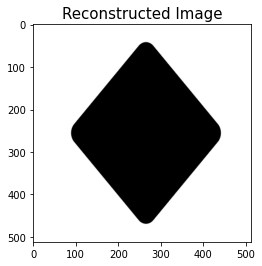

In [333]:
# Proceso inversos según orden de preponderancia

iYfc_3 = Yfc3 - 65
iYfc_3 = iYfc_3/26
iYfc_3 = np.power(10,iYfc_3)

# Espectro Del Circulo

Espec_Rombo = iYfc_3*(np.cos(phase3)+ np.sin(phase3)*1j) # np.angle

## Transformada Inversa del Espectro de la Elipse - Reconstrucción de la Imagen

iYfc1_4 = np.fft.ifftshift(Espec_Rombo)
iYfc1_img4 = np.fft.ifft2(iYfc1_4).real   #imagen Obtenida


plt.figure(0)
plt.imshow(iYfc1_img4 *255,cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()


# Guardamos la Imagen de Salida para su visualizacion al final #
io.imwrite('Recons_Img_Rombo.png', (iYfc1_img4*255).astype('uint8')) 

# **Ploteo  - Imágen Rombo** 

*   Imagen Original ( Rombo - Luminancia YD)
*   DFT (Transformada de Fourier Discreta) -  Magnitud/Espectro & Fase 
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen 


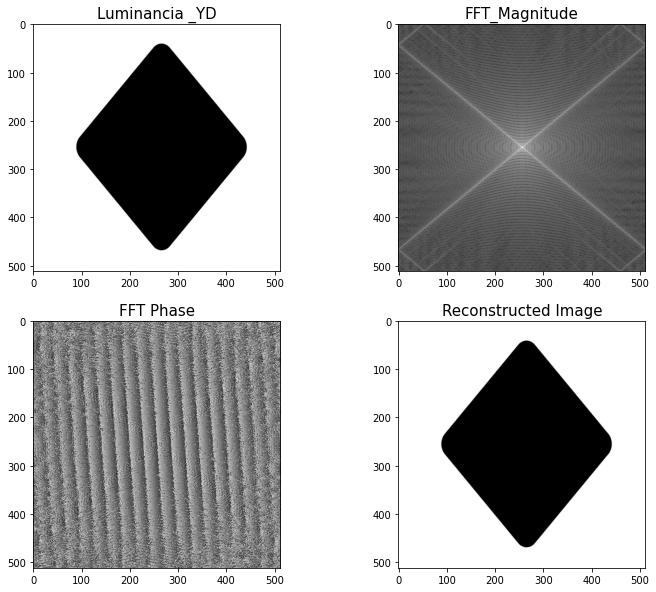

In [334]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1), 
plt.imshow(im3,'gray')
plt.title('Luminancia _YD', size=15)


plt.subplot(2,2,2), 
plt.imshow(Yfc1_3,'gray')
plt.title('FFT_Magnitude', size=15)


plt.subplot(2,2,3),
plt.imshow(phase3,'gray')
plt.title('FFT Phase', size=15)


plt.subplot(2,2,4),
plt.imshow(iYfc1_img4 *255, cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Función para leer la imágen y mostrarla**

#**Rectángulo**



(582, 966, 3) <class 'numpy.ndarray'>


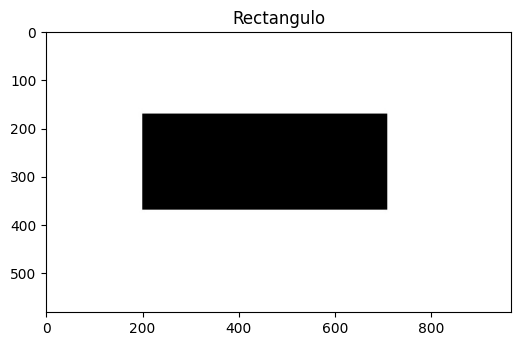

In [335]:
## Defino el path ##

path5 = '/content/Rectangulo.jpg'

## Leo la Imagen en función del path ##

ima5 = read_ima(path5)

### Graficamos la imagen 5 ###

plot_image(ima5 ,title='Rectangulo')

#**Convertimos cada pixel de la imagen del espacio RGB al espacio YIQ para trabajar con la Luminancia**

In [336]:
### Función para leer los canales RGB - Normalizamos para pasar de RGB a YIQ ###

def channels_ima(ima):
    r, g, b = ima[:, :, 0]/255.0, ima[:, :, 1]/255.0, ima[:, :, 2]/255.0
    return r, g, b

re,ge,be = channels_ima(ima5)

# **Valores de Ye Ie Qe - Imágen E (Rectangulo)**

In [337]:
### Valores de Y I Q , para la imagen e

Re,Ge,Be = clip_rgb(re,ge,be)

#### Trasformacion del Espacio RGB al Espacio YIQ  ####

Ye,Ie,Qe = trans_rgb_to_yiq(Re,Ge,Be)

YE,IE,QE = clip_yiq(Ye,Ie,Qe)

# Obtenemos la Luminancia

YE



array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#**Transformada de Fourier Discreta ( Directa) - Espectro  / Magnitud - Fase**

0.12277340536394377 253.90893220680823


<Figure size 432x288 with 0 Axes>

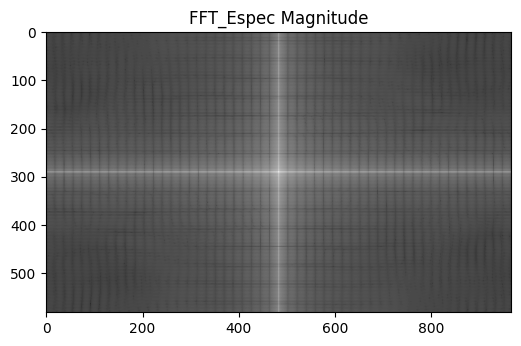

<Figure size 432x288 with 0 Axes>

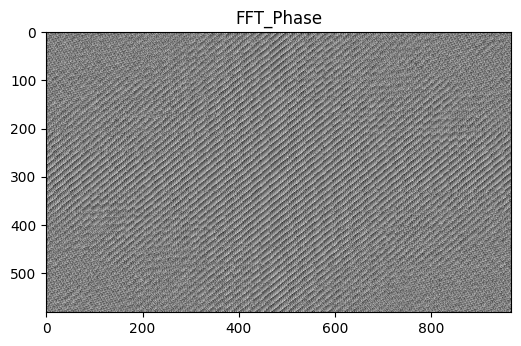

In [338]:
# Usaremos la imagen(Rombo.jpg) (Luminacia) como entrada y fft2 () 
#para obtener los componentes real e imaginaria de los coeficientes de Fourier;
# después de eso, calcularemos la magnitud / espectro y la fase.
# Finalmente, usaremos ifft2 () para reconstruir la imagen:

# Imagen de Entrada

im4 = YE

# Transformada de Fourier Rapida (FFT) para calcular la DFT (Transformada de 
#Fourier Discreta)- Trabajamos sobre la Luminanci

fc4 = np.fft.fftshift(np.fft.fft2(im4)) #numpy  

# Para conocer la parte real e imaginaria de la Transformada de Fourier tenemos 
# que determinar el valor absoluto y el angulo de la Transformada para conocer 
# su Magnitud y su Fase Respectivamente

# Magnitud

mag4 = np.abs(fc4)

# Fase

phase4 = np.angle(fc4)


# Escalamos para Obtener matriz para valores entre 0 y 255

Yfc4 = np.log10(mag4)
Yfc4 = 30*Yfc4 
Yfc4 += 84


print(Yfc4.min(),Yfc4.max()) ##TENER EN CUENTA

Yfc1_4 = np.clip(Yfc4,0,255)
Yfc1_4 = Yfc4.astype('uint8')   


# Ploteamos Magnitud del Espectro FFT

plt.figure(0)
plot_image(Yfc1_4,'FFT_Espec Magnitude',cmap='gray')

# Ploteamos la Fase FFT

plt.figure(1)
plot_image(phase4,'FFT_Phase',cmap='gray')

#**Transformada de Fourier Discreta Inversa (IDFT) - Reconstrucción de la imágen**

# **Generación el espectro a partir de la Magnitud y Fase Obtenidas**

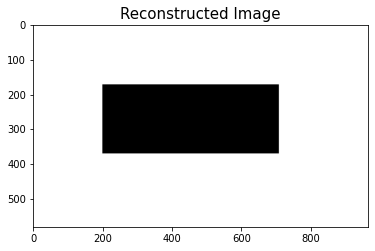

In [339]:
# Proceso inversos según orden de preponderancia

iYfc_4 = Yfc4 - 84
iYfc_4 = iYfc_4/30
iYfc_4 = np.power(10,iYfc_4)

# Espectro Del Circulo

Espec_Rectang = iYfc_4*(np.cos(phase4)+ np.sin(phase4)*1j) # np.angle

## Transformada Inversa del Espectro de la Elipse - Reconstrucción de la Imagen

iYfc1_5 = np.fft.ifftshift(Espec_Rectang)
iYfc1_img5 = np.fft.ifft2(iYfc1_5).real   #imagen Obtenida


plt.figure(0)
plt.imshow(iYfc1_img5 *255,cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Ploteo  - Imágen Rectangulo** 

*   Imagen Original ( Rectangulo - Luminancia YE)
*   DFT (Transformada de Fourier Discreta) -  Magnitud/Espectro & Fase 
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen 


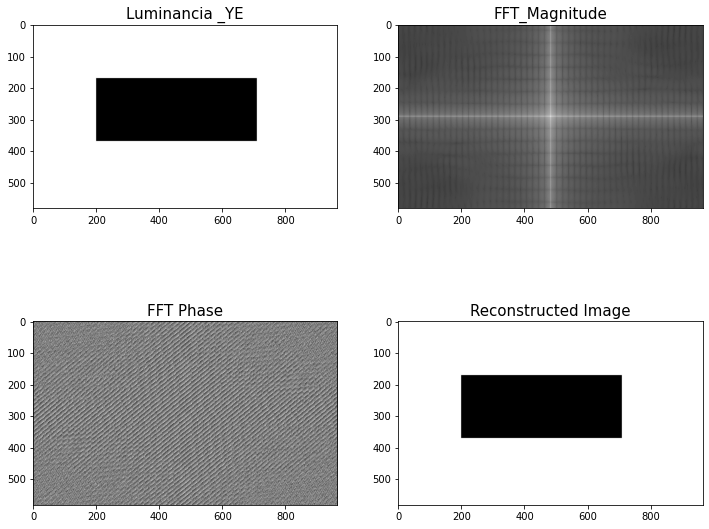

In [340]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1), 
plt.imshow(im4,'gray')
plt.title('Luminancia _YE', size=15)


plt.subplot(2,2,2), 
plt.imshow(Yfc1_4,'gray')
plt.title('FFT_Magnitude', size=15)


plt.subplot(2,2,3),
plt.imshow(phase4,'gray')
plt.title('FFT Phase', size=15)


plt.subplot(2,2,4),
plt.imshow(iYfc1_img5 *255, cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.show()

# **Guardar el espectro de amplitud de una imagen en un bitmap para su posterior modificación**

In [376]:
plt.imsave('Espec_Circ.bmp',Yfc1,cmap='gray')

# **Cargamos el espectro de imagen a partir de un bitmap**

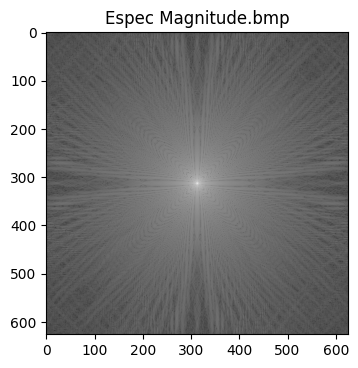

In [377]:
Img_Espec_Circ = io.imread('Espec_Circ.bmp')
plot_image(Img_Espec_Circ,'Espec Magnitude.bmp','gray')


# **Cargamos el espectro de imagen modificado a partir de un bitmap**

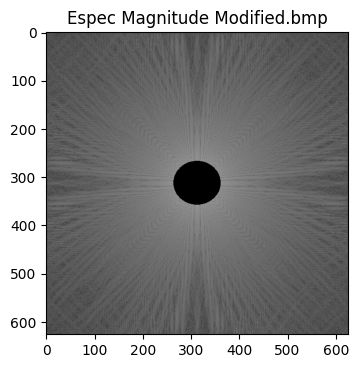

In [386]:
Img_Espec_Circ_Modif = io.imread('/content/Espec_Circ_Modificado.bmp')
plot_image(Img_Espec_Circ_Modif,'Espec Magnitude Modified.bmp')


#**Transformada de Fourier Discreta ( Directa) - Espectro  / Magnitud - Fase**

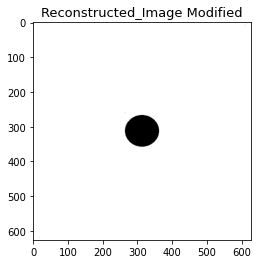

In [392]:
# Usaremos la imagen(Img_Espec_Circ_Modif.jpg)  para obtener la Imagen Reconstruida

# # Imagen de Entrada

im10 = Img_Espec_Circ_Modif

# Transformada de Fourier Rapida (FFT) para calcular la DFT (Transformada de 
#Fourier Discreta)

fc10 = np.fft.fftshift(np.fft.fft2(im10)) #numpy  


# Mantenemos la Fase # Te da en Radianes [-3.14 , 3.14]

phase = np.angle(fc)

# Transformada de Fourier inversa para volver a la imagen.

im_10 = np.fft.ifft2(np.fft.fft2(im10)).real

# Guardamos la Imagen de Salida para su visualizacion al final #
io.imwrite('Rec_Imag_Modified.bmp',im_10.astype('uint8'))


plt.figure(0)
plt.imshow(im_10, cmap='gray')
plt.title('Reconstructed_Image Modified', size=13)

plt.show()

 


# **Ploteo  - Imágen Circulo - Modificaciones** 

*   Imagen Original ( Circulo - Luminancia Ya)
*   DFT (Transformada de Fourier Discreta) -  Magnitud/Espectro & Fase 
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen.
*   Imagen Guardada/Modificada en formato.bmp
*   IDFT (Transformada de Fourier Discreta Inversa) - Reconstrucción de la Imágen Modificada




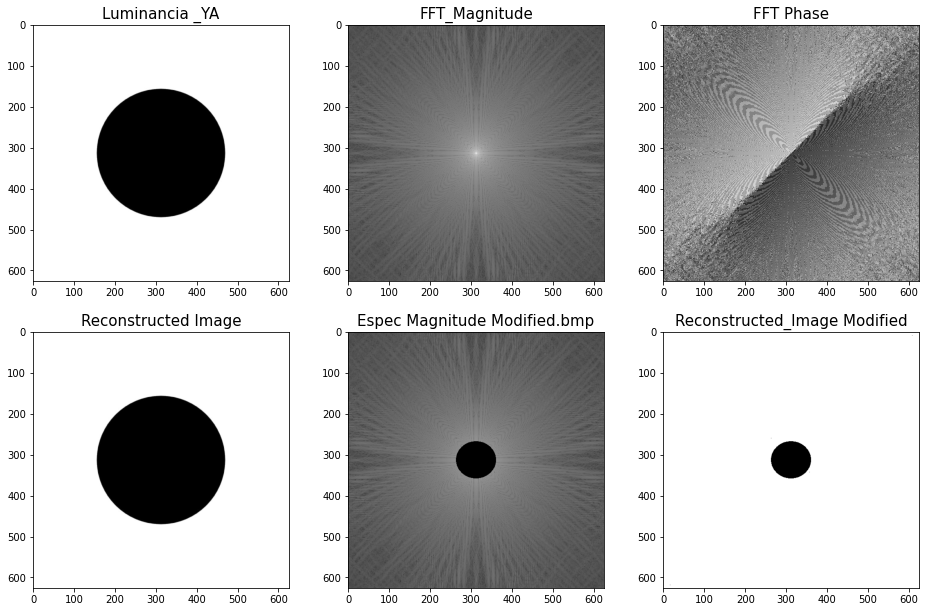

In [393]:
plt.figure(figsize=(16,16))


plt.subplot(3,3,1), 
plt.imshow(im,'gray')
plt.title('Luminancia _YA', size=15)


plt.subplot(3,3,2), 
plt.imshow(Yfc1,'gray')
plt.title('FFT_Magnitude', size=15)


plt.subplot(3,3,3),
plt.imshow(phase,'gray')
plt.title('FFT Phase', size=15)


plt.subplot(3,3,4),
plt.imshow(iYfc1_img1*255, cmap='gray')
plt.title('Reconstructed Image', size=15)

plt.subplot(3,3,5),
plt.imshow(Img_Espec_Circ_Modif,cmap='gray')
plt.title('Espec Magnitude Modified.bmp', size=15)

plt.subplot(3,3,6),
plt.imshow(im_10, cmap='gray')
plt.title('Reconstructed_Image Modified', size=15)



plt.show()

# **Función para leer las imagenes - FFT / Magnitud Fase**




In [394]:
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im

## Path de imagenes ##

Circulo = '/content/Circulo.jpg'   # Imagen A
Cuadrado = '/content/Cuadrado.jpg'   # Imagen B
Rombo = '/content/Rombo.jpg'   # Imagen D
Imagen1 = '/content/Espec_Circ.bmp'

## Path de imagenes guardadas luego de la FFT - Circulo

FFT_Mag_Circ = '/content/FFT_Magnitude_Circ.png' # Magnitud FFT
FFT_Phase_Circ = '/content/FFT_Phase_Circ.png'     # Phase
Recons_Img_Cir = '/content/Recons_Img_Cir.png'     # Reconstruccion de la Imagen

## Path de imagenes guardadas luego de la FFT - Cuadrado

FFT_Mag_Cuadr = '/content/FFT_Magnitude_Cuadr.png' # Magnitud FFT
FFT_Phase_Cuadr = '/content/FFT_Phase_Cuadr.png'     # Phase
Recons_Img_Cuadr = '/content/Recons_Img_Cuadr.png'     # Reconstruccion de la Imagen

## Path de imagenes guardadas luego de la FFT - Rombo

FFT_Mag_Rombo = '/content/FFT_Magnitude_Rombo.png' # Magnitud FFT
FFT_Phase_Rombo = '/content/FFT_Phase_Rombo.png'     # Phase
Recons_Img_Rombo = '/content/Recons_Img_Rombo.png'     # Reconstruccion de la Imagen

## Path de imagenes guardadas luego de la FFT - Rombo

Imagen_Modi = '/content/Espec_Circ_Modificado.bmp'

Recons_Img_Modi = "/content/Rec_Imag_Modified.bmp"

#**Visualización e Información de la Imagen FFT**

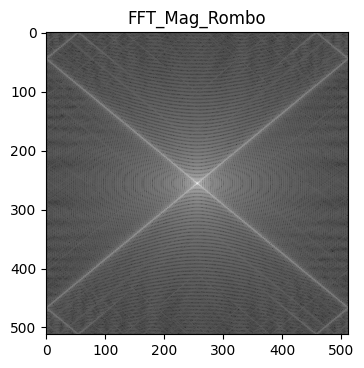

In [400]:
#@title Espacio RGB - Selecccione una Imágen. { run: "auto" }

Imagen = 'FFT_Mag_Rombo' #@param ["Circulo","Rombo","Cuadrado","Imagen1","FFT_Mag_Circ","FFT_Phase_Circ","Recons_Img_Cir","FFT_Mag_Cuadr","FFT_Phase_Cuadr","Recons_Img_Cuadr","FFT_Mag_Rombo","FFT_Phase_Rombo","Recons_Img_Rombo","Imagen_Modi","Recons_Img_Modi"]

if Imagen == 'Circulo':
  im = get_image(Circulo)
  plot_image(im, 'Circulo')
if Imagen == 'Cuadrado':
  im = get_image(Cuadrado)
  plot_image(im, 'Cuadrado')
if Imagen == 'Rombo':
  im = get_image(Rombo)
  plot_image(im, 'Rombo')

if Imagen == 'Imagen1':
  im = get_image(Imagen1)
  plot_image(im, 'Imagen1') 

elif Imagen == 'FFT_Mag_Circ':
  im = get_image(FFT_Mag_Circ)
  plot_image(im,'FFT_Mag_Circ','gray')
elif Imagen == 'FFT_Phase_Circ':
  im = get_image(FFT_Phase_Circ)
  plot_image(im,'FFT_Phase_Circ','gray')
elif Imagen == 'Recons_Img_Cir':
  im = get_image(Recons_Img_Cir)
  plot_image(im,'Recons_Img_Cir','gray')

  
elif Imagen == 'FFT_Mag_Cuadr':
  im = get_image(FFT_Mag_Cuadr)
  plot_image(im,'FFT_Mag_Cuadr','gray')
elif Imagen == 'FFT_Phase_Cuadr':
  im = get_image(FFT_Phase_Cuadr)
  plot_image(im,'FFT_Phase_Cuadr','gray')
elif Imagen == 'Recons_Img_Cuadr':
  im = get_image(Recons_Img_Cuadr)
  plot_image(im,'Recons_Img_Cuadr','gray')

elif Imagen == 'FFT_Mag_Rombo':
  im = get_image(FFT_Mag_Rombo)
  plot_image(im,'FFT_Mag_Rombo','gray')
elif Imagen == 'FFT_Phase_Rombo':
  im = get_image(FFT_Phase_Rombo)
  plot_image(im,'FFT_Phase_Rombo','gray')
elif Imagen == 'Recons_Img_Rombo':
  im = get_image(Recons_Img_Rombo)
  plot_image(im,'Recons_Img_Rombo','gray')
  
elif Imagen == 'Imagen_Modi':
  im = get_image(Imagen_Modi)
  plot_image(im,Imagen_Modi,'gray')

elif Imagen == 'Recons_Img_Modi':
  im = get_image(Recons_Img_Modi)
  plot_image(im,Recons_Img_Modi,'gray')




